# Age, Sex, and Cholesterol: Some of the Factors Behind Heart Disease

# Background

Heart disease, or any disorder that affects the function of the heart is one of the leading causes of death in the United States. According to the [Centers for Disease Control and Protection](https://www.cdc.gov/heartdisease/about.htm), approximately 1 in 4 annual deaths is caused by heart disease. There are many risk factors for heart disease including but not limited to obesity, diabetes, and poor diet. It is said that many people suffer from heart disease silently until they experience major or life threatening symptoms. 

For this analysis project, we will explore the various effects on an individual's chances of getting heart disease. The [dataset ](https://https://www.kaggle.com/fedesoriano/heart-failure-prediction) given by Kaggle provides the following data: 
*   Age
*   Sex
*   Chest Pain Type
*   Resting BP(Blood Pressure)
*   Cholesterol
*   Fasting BS(Blood Sugar)
*   Resting ECG
*   Max HR(Heart Rate)
*   Exercise Angina
*   Oldpeak
*   ST Slope
*   Heart Disease [1: heart disease, 0: Normal]


# Data

In [ ]:
#imports for analysis and visualizations
import pandas as pd
import numpy as py
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='white')

In [ ]:
#read data file
df = pd.read_csv('Data/heart.csv')

In [ ]:
#list of all features in dataset and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#first 10 rows in data frame
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Analysis

*Let's begin by exploring two of the most important features in the dataset, age and sex as it is most commonly beleievd that a certain demographic within those two pose a much higher risk. The dataset includes data from 918 indivudals, both male and female within a wide age range.*

In [ ]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

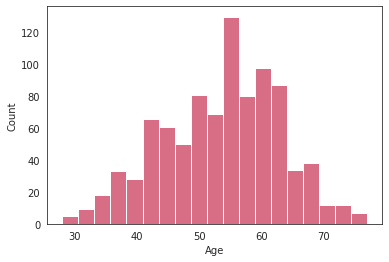

In [ ]:
sns.histplot(x=df['Age'], color='#CC3D5C')

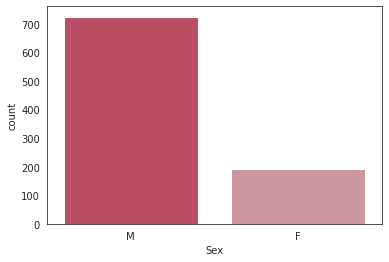

In [ ]:
#gender distribution in dataset
sns.countplot(x=df['Sex'], palette=['#CC3D5C','#D68E9B'])

**Types of Chest Pain**
*   ATA: Atypical Angina
*   NAP: Non-Anginal Pain
*   ASY: Asymptomatic
*   TA: Typical Angina

🔖Angina: A type of chest pain that occurs when there is reduced blood flow to the heart.

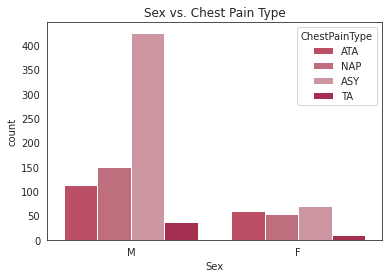

In [ ]:
#Sex vs. ChestPainType
sns.countplot(x=df['Sex'],hue=df['ChestPainType'], palette=['#CC3D5C','#CC6174', '#D68E9B', '#B81B47']).set(title='Sex vs. Chest Pain Type');

**Types of ECG**
* LVH: Left Ventricular Hypertrophy

🔖ECG: Electrocardiography








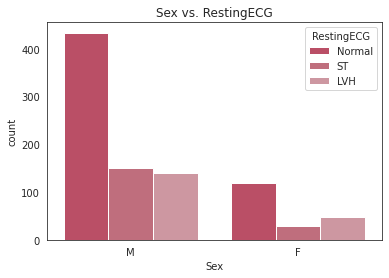

In [ ]:
sns.countplot(x=df['Sex'],hue=df['RestingECG'], palette=['#CC3D5C','#CC6174', '#D68E9B', '#B81B47']).set(title='Sex vs. RestingECG');

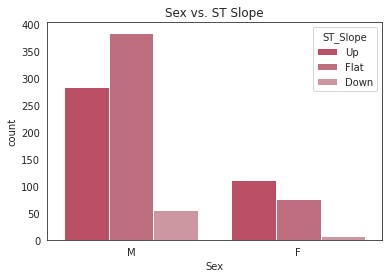

In [ ]:
sns.countplot(x=df['Sex'], hue=df['ST_Slope'],palette=['#CC3D5C','#CC6174', '#D68E9B', '#B81B47']).set(title='Sex vs. ST Slope');

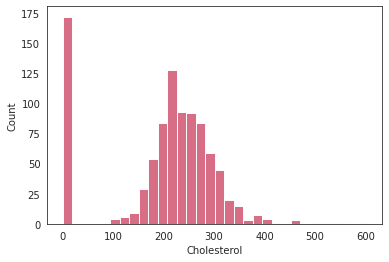

In [ ]:
sns.histplot(x=df['Cholesterol'], color='#CC3D5C')

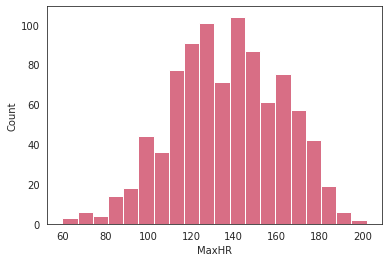

In [ ]:
sns.histplot(x=df['MaxHR'], color='#CC3D5C')

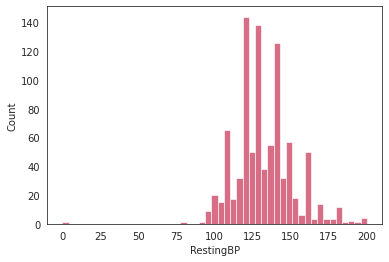

In [ ]:
sns.histplot(x=df['RestingBP'], color='#CC3D5C')

🔖FastingBS(Blood Sugar): This measures your blood sugar after an overnight fast (not eating). A [fasting blood sugar level](https://www.cdc.gov/diabetes/basics/getting-tested.html) of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.

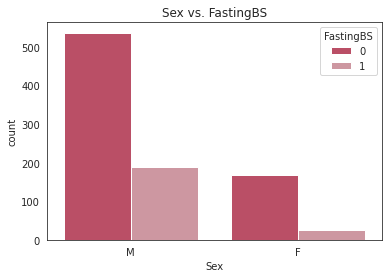

In [ ]:
sns.countplot(x=df['Sex'],hue=df['FastingBS'], palette=['#CC3D5C','#D68E9B']).set(title='Sex vs. FastingBS');

**Heart Disease Classification**
*   1: Heart Disease
*   0: Normal



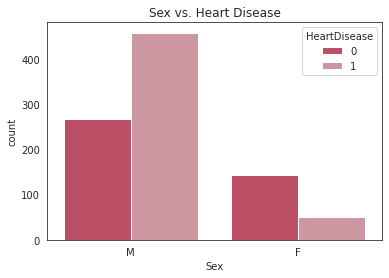

In [ ]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'], palette=['#CC3D5C','#D68E9B']).set(title='Sex vs. Heart Disease');

One of the major and most obvious conclusions that can be drawn from this analysis is the imabalance between M(Male) and F(Female) for the 'sex' feature of the dataset. Aproximately 77% of particiapnts in the dataset identified as male which creates a discrepency in all analyses gathered using 'sex' as a study feature. For example, you can see such pattern in the Sex vs. Chest Pain Type and Sex vs. ST Slope countplots provided above. 

This creates a tender bias and it is unclear whether males are truly at a higher risk of heart disease than females. That being said, the population of this dataset is rather small comapred to the billions of people in the world.
The dataset provided gave more than enough features and data to create a solid analaysis on heart failure prediction, however it is safe to say that the data can continue to be extended and there are many other features that can be included such as whether an individual suffers from other medical conditions(diabetes, obesity, hyptertension), quality of diet, family history of heart disease, frequency of physical activity, etc.These factors all hold importance and any dataset can have room for improvement.